In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for sheet in misinfotext_file.sheet_names:
        if sheet == "Summary":
            continue
        
        df = pd.read_excel(misinfotext_file, sheet_name=sheet)
        df["year"] = sheet
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for sheet in fakespeak_file.sheet_names:
        if sheet == "Summary":
            continue
        
        df = pd.read_excel(fakespeak_file, sheet_name=sheet)
        df["year"] = sheet
        yield df

In [3]:
years_dfs = list(get_years_dfs(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_lexical_density.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_lexical_density.xlsx",
))

In [4]:
years_dfs[0].head()

,factcheckURL,lexical_density,year
0,http://www.politifact.com/truth-o-meter/statem...,0.556863,2009
1,http://www.politifact.com/truth-o-meter/statem...,0.580347,2009
2,http://www.politifact.com/truth-o-meter/statem...,0.515021,2009
3,http://www.politifact.com/truth-o-meter/statem...,0.542100,2009
4,http://www.politifact.com/truth-o-meter/statem...,0.531746,2009


Graph to see if normally distributed

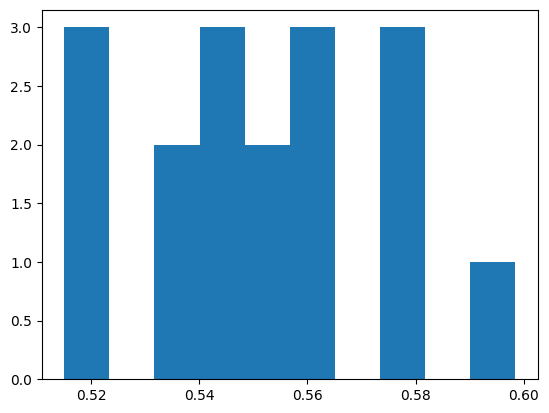

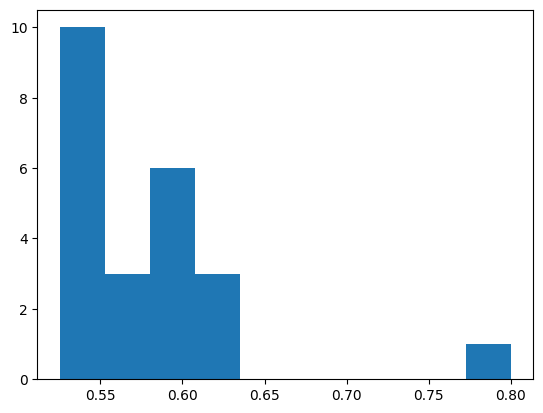

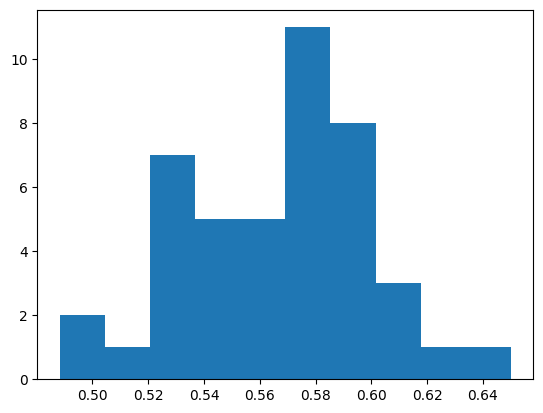

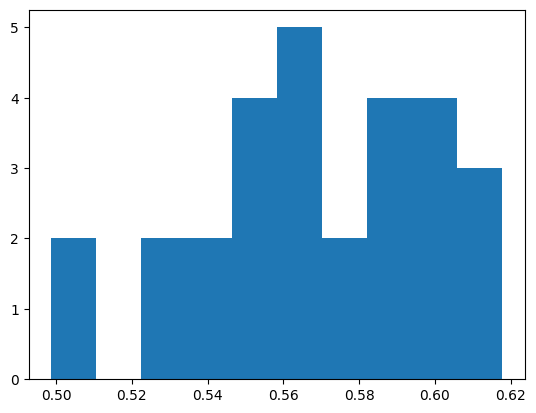

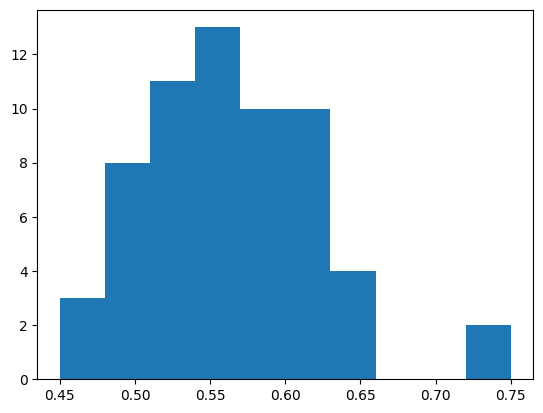

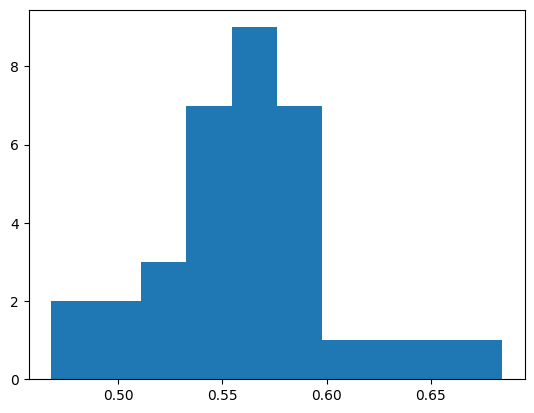

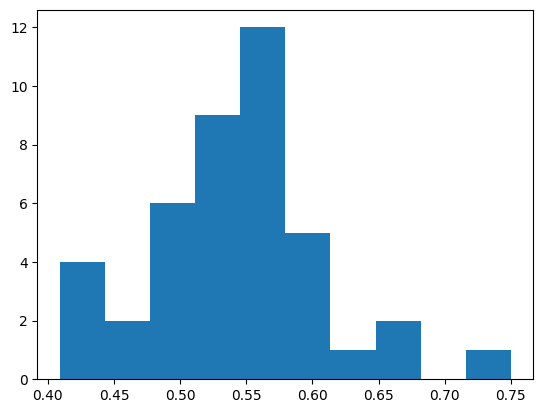

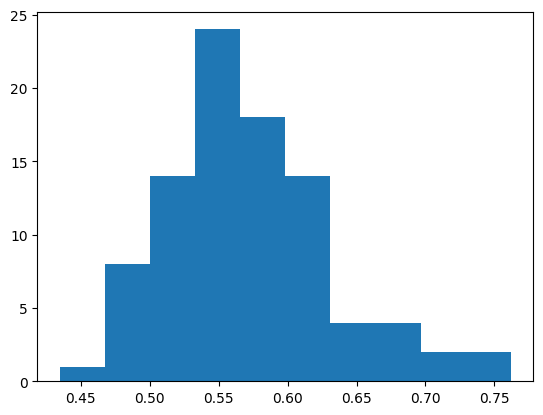

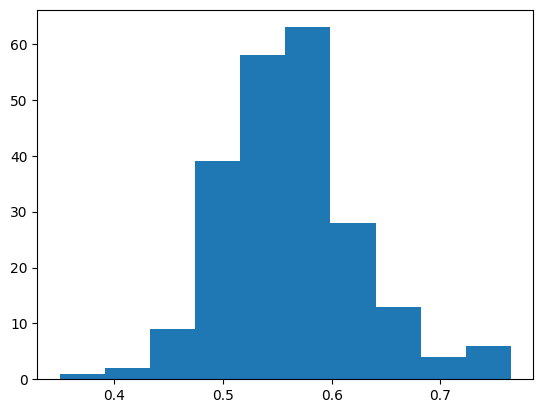

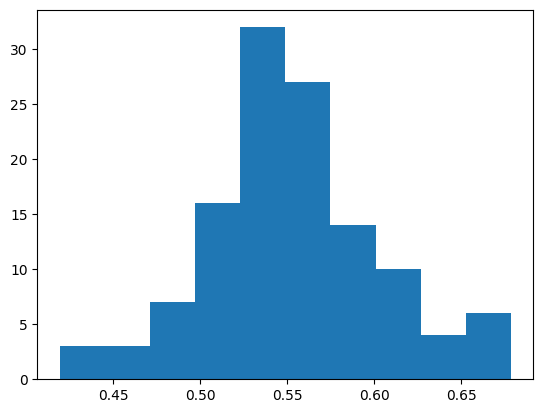

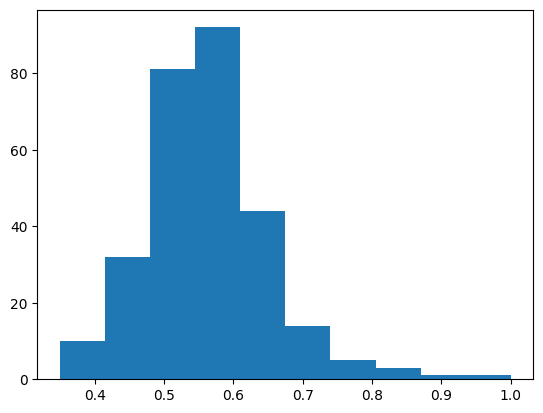

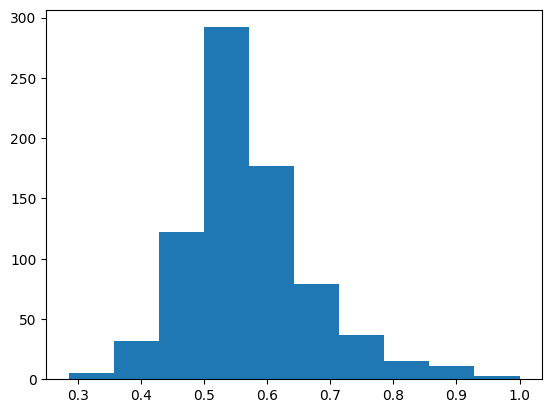

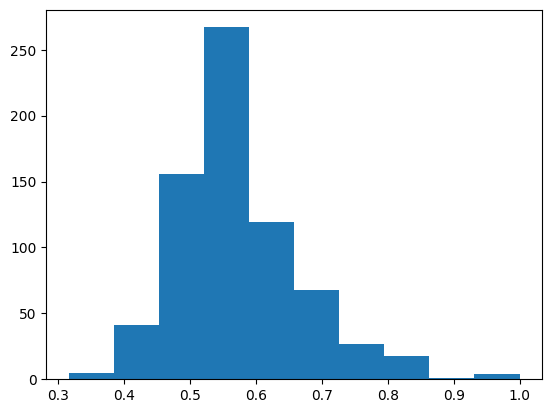

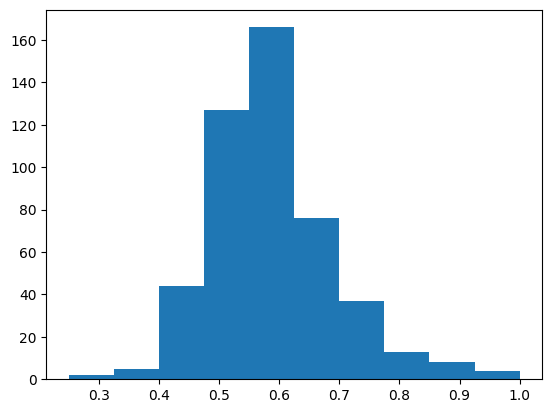

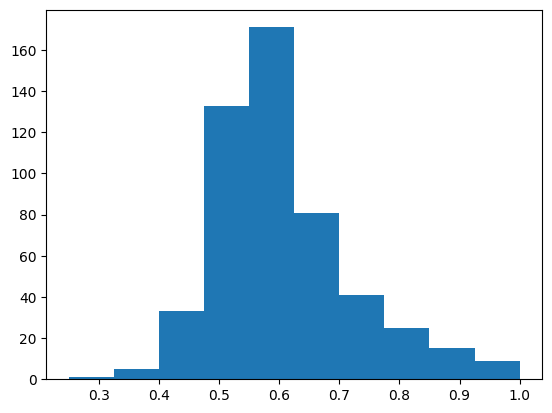

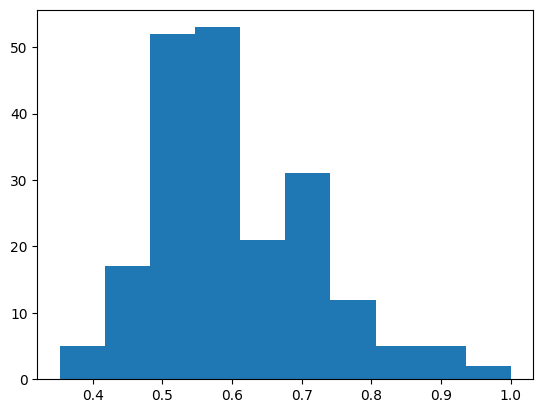

In [5]:
for df in years_dfs:
    plt.figure()
    plt.hist(df["lexical_density"])

Not normally distributed for all years, so use non-parametric test

In [6]:
from scipy.stats import kruskal

In [7]:
kruskal(*[df["lexical_density"] for df in years_dfs])

KruskalResult(statistic=73.93307300508717, pvalue=8.819211344509398e-10)

There is a statistically significant difference in lexical density between the years